In [1]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence, pack_sequence
import onnx

from model_model import SiameseNetwork
from model_configs import ModelDimConfigs, TrainingConfigs
from misc_tools import get_timestamp

In [2]:
dimconf = ModelDimConfigs(
        rnn_in_size=64, 
        lin_in_size_1=32, 
        lin_in_size_2=16, 
        lin_out_size_2=1
    )

model = SiameseNetwork(
    dimconf=dimconf
)

In [3]:
model

SiameseNetwork(
  (rnn): SelfPackLSTM(
    (rnn): LSTM(64, 32, num_layers=2, batch_first=True)
  )
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
  (sigmoid): Sigmoid()
)

In [6]:
x1 = torch.rand(3, 20, 64)
x2 = torch.rand(3, 12, 64)

l1 = torch.randint(1, 20, (3, ))
l2 = torch.randint(1, 12, (3, ))

In [7]:
o = model((x1, x2), (l1, l2))

In [8]:
onnx_path = "save.onnx"
torch.onnx.export(model, ((x1, x2), (l1, l2)), onnx_path)

In [3]:
torch.save(model.state_dict(), "save.pth")

In [49]:
x = torch.randn(3, 4, 5)
x_lens = torch.tensor([1, 2, 4])

In [51]:
torch.nn.functional.one_hot(x_lens - 1)

tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]])

In [44]:
nx = x[, :]

In [45]:
nx.shape

torch.Size([3, 3, 4, 5])

In [55]:
torch.index_select(x, 1, x_lens - 1).shape

torch.Size([3, 3, 5])

In [28]:
import time
import pylab as pl
from IPython import display
import time
import random
import matplotlib.pylab as plt
from IPython import display

In [42]:
def draw_learning_curve_and_accuracy(losses, accs, epoch=""): 
    plt.clf()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    train_losses, valid_losses, best_val_loss = losses
    valid_accs = accs

    # Plot Loss on the left subplot
    ax1.plot(train_losses, label='Train')
    ax1.plot(valid_losses, label='Valid')
    ax1.axvline(x=best_val_loss, color='r', linestyle='--', label="Best: " + str(best_val_loss))
    ax1.set_title("Learning Curve Loss" + f" {epoch}")
    ax1.legend(loc="upper right")

    # Plot Accuracy on the right subplot
    ax2.plot(valid_accs, label='Valid')
    ax2.set_title('Learning Curve Accuracy' + f" {epoch}")
    ax2.legend(loc="lower right")

    # Display the plots
    plt.tight_layout()
    plt.xlabel("Epoch")
    display.clear_output(wait=True)
    display.display(plt.gcf())

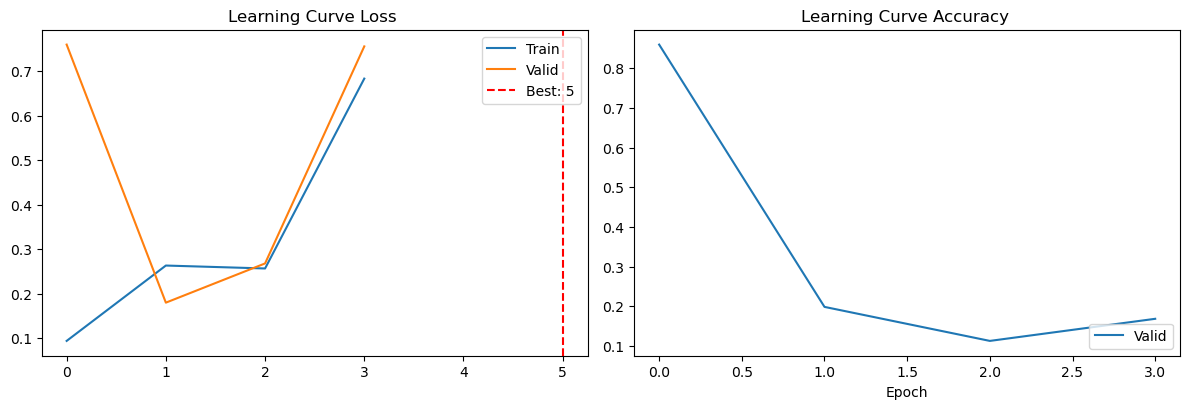

<Figure size 640x480 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

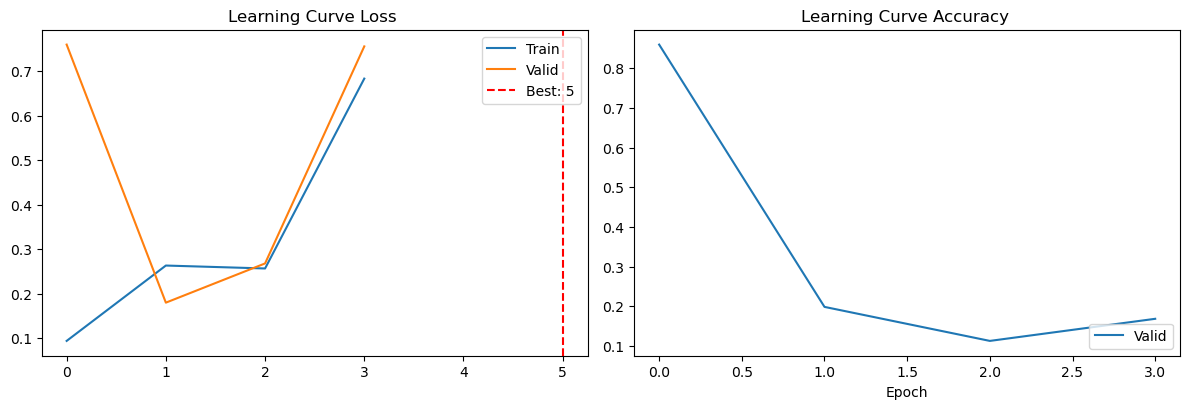

In [43]:
train_losses = []
valid_losses = []

valid_accs = []

while True:
    try:

        train_losses.append(random.random())
        valid_losses.append(random.random())

        valid_accs.append(random.random())

        draw_learning_curve_and_accuracy((train_losses, valid_losses, 5), (valid_accs))
        time.sleep(1)
    except KeyboardInterrupt:
        break

In [1]:
import pandas as pd
import os
from paths import *

In [2]:
guide_file = pd.read_csv(os.path.join(src_, "guide_mod.csv"))

In [3]:
guide_file["segment_nostress"].unique().tolist()

['sil',
 'CH',
 'AE',
 'P',
 'T',
 'ER',
 'W',
 'AH',
 'N',
 'sp',
 'M',
 'IH',
 'S',
 'Z',
 'R',
 'EY',
 'L',
 'D',
 'AY',
 'V',
 'JH',
 'EH',
 'DH',
 'IY',
 'OW',
 'AW',
 'UW',
 'HH',
 'AA',
 'F',
 'TH',
 'AO',
 'B',
 'UH',
 'K',
 'Y',
 'NG',
 'G',
 'SH',
 'OY',
 'ZH',
 'spn']

In [8]:
import torch.nn as nn
import torch

In [18]:
sm = nn.Softmax(dim=1)

In [19]:
x = torch.randn(size=(5, 10))

In [20]:
x

tensor([[ 0.8863,  0.1093,  0.9341, -0.7400, -0.1759,  0.4170, -0.6253, -2.1953,
          1.7105, -1.3972],
        [-1.6566,  0.4989, -0.8215, -0.7731,  0.8442, -0.2636, -0.2400, -0.9204,
          0.3180, -0.7191],
        [ 2.0954, -1.9509,  1.6724, -0.5004,  0.2676,  1.0348, -0.5430,  0.6520,
         -0.1656,  0.6663],
        [-1.2439, -0.4518, -1.4087,  1.8685,  1.9991, -0.5235,  0.5470, -1.0004,
          0.2612,  0.4925],
        [-0.9078, -0.1602,  0.6646,  0.0174,  1.4603, -0.3822, -0.6509, -1.3161,
          0.6787,  0.1360]])

In [22]:
y = sm(x)

In [27]:
torch.argmax(y, dim=1)

tensor([8, 4, 0, 4, 4])

In [ ]:
# data = {'type': ds.seg_set}
# counts = pd.DataFrame(data)["type"].value_counts()
# # Create a bar graph for vowels
# plt.figure(figsize=(15, 4))
# plt.bar(counts.index, counts.values, color='skyblue')
# plt.xlabel('Phones')
# plt.ylabel('Count')
# plt.title('Count of Phones - Dataset')
# plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# # Display the bar graph
# plt.show()


# data = {'type': ds.seg_set}
# counts = pd.DataFrame(data)["type"][train_ds.indices].value_counts()
# # Create a bar graph for vowels
# plt.figure(figsize=(15, 4))
# plt.bar(counts.index, counts.values, color='skyblue')
# plt.xlabel('Phones')
# plt.ylabel('Count')
# plt.title('Count of Phones - Trainset')
# plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# # Display the bar graph
# plt.show()


# data = {'type': ds.seg_set}
# counts = pd.DataFrame(data)["type"][valid_ds.indices].value_counts()
# # Create a bar graph for vowels
# plt.figure(figsize=(15, 4))
# plt.bar(counts.index, counts.values, color='skyblue')
# plt.xlabel('Phones')
# plt.ylabel('Count')
# plt.title('Count of Phones - Validset')
# plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# # Display the bar graph
# plt.show()

In [4]:
from paths import *
import os
import pandas as pd

In [5]:
log = pd.read_csv(os.path.join(src_, "guide_mod.csv"))

In [6]:
log

,segment,file,id,startTime,endTime,nSample,segment_nostress,stress_type
0,sil,103-1240-0000,0,0.00,0.44,7040,sil,SNA
1,CH,103-1240-0000,1,0.44,0.57,2080,CH,SNA
2,AE1,103-1240-0000,2,0.57,0.63,960,AE,1
3,P,103-1240-0000,3,0.63,0.70,1120,P,SNA
4,T,103-1240-0000,4,0.70,0.75,800,T,SNA
...,...,...,...,...,...,...,...,...
3685868,M,911-130578-0020,77,7.74,7.81,1120,M,SNA
3685869,F,911-130578-0020,78,7.81,7.97,2560,F,SNA
3685870,UW1,911-130578-0020,79,7.97,8.18,3360,UW,1
3685871,D,911-130578-0020,80,8.18,8.29,1760,D,SNA


In [10]:
log.groupby('segment_nostress').groups

{'AA': [95, 125, 257, 304, 347, 398, 426, 436, 479, 483, 544, 613, 788, 897, 930, 1008, 1095, 1099, 1121, 1325, 1396, 1474, 1494, 1588, 1684, 1760, 1801, 2265, 2325, 2428, 2620, 2677, 2767, 2770, 2854, 2904, 2942, 2947, 2957, 3185, 3317, 3322, 3333, 3365, 3480, 3573, 3619, 3631, 3651, 3678, 3681, 3688, 3781, 3801, 3906, 3980, 4015, 4070, 4128, 4176, 4226, 4249, 4295, 4465, 4602, 4647, 4759, 4816, 4906, 4973, 5019, 5064, 5073, 5156, 5169, 5345, 5379, 5511, 5638, 5655, 5729, 5743, 5795, 5853, 5866, 5914, 5962, 5983, 6008, 6115, 6145, 6246, 6406, 6629, 6636, 6674, 6681, 6821, 6907, 6917, ...], 'AE': [2, 63, 151, 164, 276, 366, 411, 462, 496, 522, 526, 578, 630, 637, 750, 766, 830, 843, 878, 916, 987, 1026, 1047, 1049, 1085, 1125, 1183, 1188, 1194, 1203, 1263, 1295, 1415, 1420, 1528, 1585, 1596, 1626, 1640, 1642, 1658, 1669, 1723, 1737, 1748, 1751, 1754, 1764, 1783, 1816, 1868, 1875, 1881, 1890, 1957, 1973, 1993, 2007, 2011, 2042, 2046, 2059, 2078, 2098, 2143, 2183, 2200, 2237, 2246, 2268,

In [4]:
import torch.nn.functional as F
import torch

In [5]:
output1 = torch.randn(2, 10)
output2 = torch.randn(2, 10)

In [13]:
euclidean_distance = F.pairwise_distance(output1, output2)

In [16]:
euclidean_distance

tensor([2.8290, 7.0970])

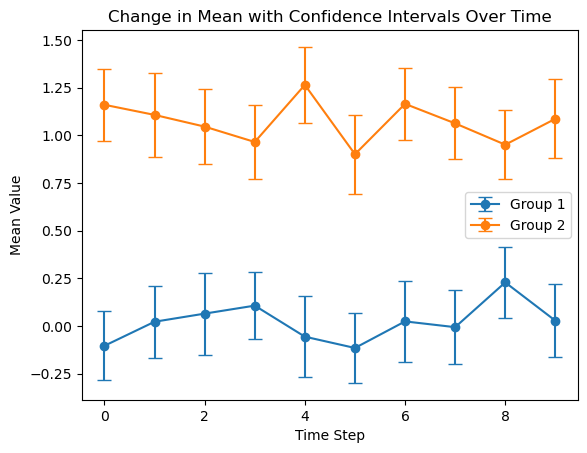

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming data1 and data2 are the data points for two groups at each time step
# Assuming alpha is the confidence level (e.g., 0.95 for a 95% confidence interval)

# Generate example data
np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=(10, 100))
data2 = np.random.normal(loc=1, scale=1, size=(10, 100))

# Calculate mean and confidence interval for each group at each time step
mean1 = np.mean(data1, axis=1)
ci1 = stats.t.interval(confidence=0.95, df=len(data1[0])-1, loc=np.mean(data1, axis=1), scale=stats.sem(data1, axis=1))

mean2 = np.mean(data2, axis=1)
ci2 = stats.t.interval(confidence=0.95, df=len(data2[0])-1, loc=np.mean(data2, axis=1), scale=stats.sem(data2, axis=1))

# Plotting
time_steps = np.arange(len(mean1))

plt.errorbar(time_steps, mean1, yerr=(mean1 - ci1[0], ci1[1] - mean1), label='Group 1', fmt='o-', capsize=5)
plt.errorbar(time_steps, mean2, yerr=(mean2 - ci2[0], ci2[1] - mean2), label='Group 2', fmt='o-', capsize=5)

plt.xlabel('Time Step')
plt.ylabel('Mean Value')
plt.title('Change in Mean with Confidence Intervals Over Time')
plt.legend()
plt.show()


In [31]:
import torch
import numpy as np
from scipy import stats

def calculate_mean_ci(dissimilarities, labels, alpha=0.95):
    """
    Calculate mean, upper confidence interval, and lower confidence interval of dissimilarities for each label category.

    Args:
    - dissimilarities (torch.Tensor): Tensor of dissimilarities.
    - labels (torch.Tensor): Tensor of binary labels (0 for "same" and 1 for "different").
    - alpha (float): Confidence level for calculating the confidence interval.

    Returns:
    - dict: Dictionary containing mean, upper confidence interval, and lower confidence interval for each label category.
    """

    # Convert PyTorch tensors to NumPy arrays
    dissimilarities_np = dissimilarities.cpu().numpy()
    labels_np = labels.cpu().numpy()

    # Calculate mean, upper confidence interval, and lower confidence interval for "same" label
    indices_same = labels_np == 0
    dissimilarities_same = dissimilarities_np[indices_same]

    mean_same = np.mean(dissimilarities_same)
    ci_same = stats.t.interval(confidence=alpha, df=len(dissimilarities_same)-1, loc=mean_same, scale=stats.sem(dissimilarities_same))
    mean_same, ci_upper_same, ci_lower_same = mean_same, ci_same[1], ci_same[0]

    # Calculate mean, upper confidence interval, and lower confidence interval for "different" label
    indices_diff = labels_np == 1
    dissimilarities_diff = dissimilarities_np[indices_diff]

    mean_diff = np.mean(dissimilarities_diff)
    ci_diff = stats.t.interval(confidence=alpha, df=len(dissimilarities_diff)-1, loc=mean_diff, scale=stats.sem(dissimilarities_diff))
    mean_diff, ci_upper_diff, ci_lower_diff = mean_diff, ci_diff[1], ci_diff[0]

    same_res = {'mean': mean_same, 'ci_upper': ci_upper_same, 'ci_lower': ci_lower_same}
    diff_res = {'mean': mean_diff, 'ci_upper': ci_upper_diff, 'ci_lower': ci_lower_diff}

    return same_res, diff_res

# Example usage:
dissimilarities = torch.rand(100)  # Replace with your dissimilarity tensor
labels = torch.randint(0, 2, (100,))  # Replace with your label tensor

result = calculate_mean_ci(dissimilarities, labels)
print(result)


({'mean': 0.6000607, 'ci_upper': 0.6809280932976769, 'ci_lower': 0.5191933094428016}, {'mean': 0.44099528, 'ci_upper': 0.540381095256038, 'ci_lower': 0.34160945669250947})


,Name,Age,Gender
0,John,25,M


In [40]:
import pandas as pd

# Step 1: Create an empty DataFrame
df = pd.DataFrame()

# Step 2: Create a dictionary with data
data = {'Name': 'John', 'Age': 25, 'Gender': 'M'}

data2 = {"haha": "hahaha"}

# Step 3: Append the dictionary to the DataFrame
# df.loc[df.index.max()+1] = data
df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)

df = pd.concat([df, pd.DataFrame([data2])], ignore_index=True)

# Step 4: Print the DataFrame
df


,Name,Age,Gender,haha
0,John,25.0,M,NaN
1,NaN,NaN,NaN,hahaha


In [43]:
test_data = {'Name': ['John', 'Alice', 'Bob'], 'Age': [25, 30, 35], 'Gender': ['M', 'F', 'M']}
test_df = pd.DataFrame(test_data)

test_dict = test_df.to_dict('list')

test_dict

{'Name': ['John', 'Alice', 'Bob'],
 'Age': [25, 30, 35],
 'Gender': ['M', 'F', 'M']}

In [47]:
dict(zip(test_df.columns, test_df.values))

{'Name': array(['John', 25, 'M'], dtype=object),
 'Age': array(['Alice', 30, 'F'], dtype=object),
 'Gender': array(['Bob', 35, 'M'], dtype=object)}

In [48]:
df = pd.DataFrame()

In [49]:
data = {'mean': 0.6369300327025789, 'ci_upper': 0.6495752969052292, 'ci_lower': 0.6242847684999285}

In [50]:
df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)

In [52]:
data2 = {'mean': 0.6391466805641031, 'ci_upper': 0.6519536001655934, 'ci_lower': 0.6263397609626127}

In [53]:
df = pd.concat([df, pd.DataFrame([data2])], ignore_index=True)

In [57]:
df.to_dict('list')

{'mean': [0.6369300327025789, 0.6391466805641031],
 'ci_upper': [0.6495752969052292, 0.6519536001655934],
 'ci_lower': [0.6242847684999285, 0.6263397609626127]}

In [58]:
def __convert_lists_to_arrays(input_dict):
    """
    Convert all lists in a dictionary to NumPy arrays.

    Args:
    - input_dict (dict): Dictionary with lists as values.

    Returns:
    - dict: Dictionary with lists converted to NumPy arrays.
    """
    output_dict = {}
    for key, value in input_dict.items():
        if isinstance(value, list):
            output_dict[key] = np.array(value)
        elif isinstance(value, dict):
            output_dict[key] = __convert_lists_to_arrays(value)
        else:
            output_dict[key] = value
    return output_dict

In [59]:
__convert_lists_to_arrays(df.to_dict('list'))

{'mean': array([0.63693003, 0.63914668]),
 'ci_upper': array([0.6495753, 0.6519536]),
 'ci_lower': array([0.62428477, 0.62633976])}

In [68]:
x = np.arange(0, 10)

In [69]:
time_steps = np.arange(1, 5)

In [71]:
x[1:5], time_steps

(array([1, 2, 3, 4]), array([1, 2, 3, 4]))

In [91]:
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
      # Calculate the euclidian distance and calculate the contrastive loss
      euclidean_distance = F.pairwise_distance(output1, output2, keepdim = False)

      loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                    (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


      return loss_contrastive

In [107]:
ls = []
ds = []
l = ContrastiveLoss(1.5)

In [108]:
for i in range(10000):
    a = torch.randn(20, 16)
    b = torch.randn(20, 16)
    lab = torch.randint(0, 2, (20, ))
    ls.append(l(a, b, lab).item())
    ds.append((a.mean() - b.mean()).abs().item())

In [110]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(ls, ds)
correlation


0.012055441496248896

In [52]:
import torchaudio
import os
import matplotlib.pyplot as plt
import torch
import pandas as pd

from paths import *
from misc_tools import MyAudio
from model_dataset import MelSpecTransform

In [53]:
def norm(mel_spec): 
    eps = 1e-9
    mean = mel_spec.mean(0, keepdim=True)
    std = mel_spec.std(0, keepdim=True, unbiased=False)
    mel_spec = (mel_spec - mean) / (std + eps)
    return mel_spec

In [54]:
def minmax_norm(mel_spec):
    min_val = mel_spec.min(0)
    max_val = mel_spec.max(0)
    minmax_spec = (mel_spec - min_val) / (max_val - min_val)
    return minmax_spec

In [55]:
wav_filename = train_cut_audio_ + "19/198/0011/19-198-0011-0020.flac"
wave, sr = torchaudio.load(wav_filename, normalize=True)
MyAudio.play_audio_torch(wave, sample_rate=sr)

In [75]:
def norm_strip_minmax(mel_spec):
    mel_spec = mel_spec.T
    min_val = mel_spec.min(0)[0]
    max_val = mel_spec.max(0)[0]
    norm_spec = (mel_spec - min_val) / (max_val - min_val)
    return norm_spec.T

def norm_time_minmax(mel_spec):
    min_val = mel_spec.min(0)[0]
    max_val = mel_spec.max(0)[0]
    norm_spec = (mel_spec - min_val) / (max_val - min_val)
    return norm_spec

def norm_minmax(mel_spec):
    min_val = mel_spec.min()
    max_val = mel_spec.max()
    norm_spec = (mel_spec - min_val) / (max_val - min_val)
    return norm_spec
def norm_time_mvn(mel_spec):
    eps = 1e-9
    mean = mel_spec.mean(0, keepdim=True)
    std = mel_spec.std(0, keepdim=True, unbiased=False)
    norm_spec = (mel_spec - mean) / (std + eps)
    return norm_spec
def norm_strip_mvn(mel_spec):
    eps = 1e-9
    mean = mel_spec.mean(1, keepdim=True)
    std = mel_spec.std(1, keepdim=True, unbiased=False)
    norm_spec = (mel_spec - mean) / (std + eps)
    return norm_spec

In [76]:
tr = torchaudio.transforms.MelSpectrogram(n_fft=400, n_mels=64)
a2d = torchaudio.transforms.AmplitudeToDB(stype="power", top_db=80)

In [77]:
mel_spec = tr(wave)
mel_spec = mel_spec.squeeze()
mel_spec = mel_spec.permute(1, 0) # (F, L) -> (L, F)
dbspec = a2d(mel_spec)

In [78]:
nmel = norm_strip_minmax(dbspec)
nmel2 = norm_minmax(dbspec)
nmel3 = norm_time_minmax(dbspec)

zmel_1 = norm_strip_mvn(dbspec)
zmel_2 = norm_time_mvn(dbspec)

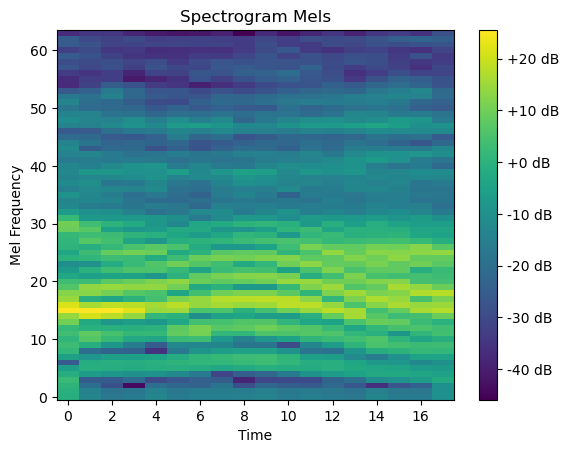

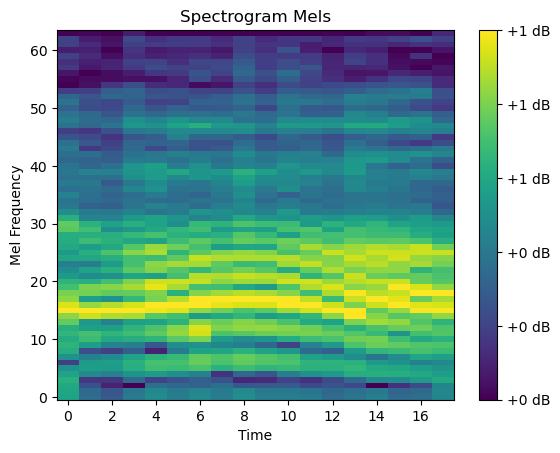

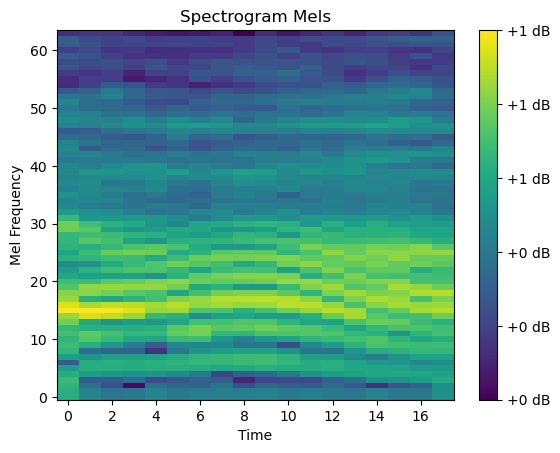

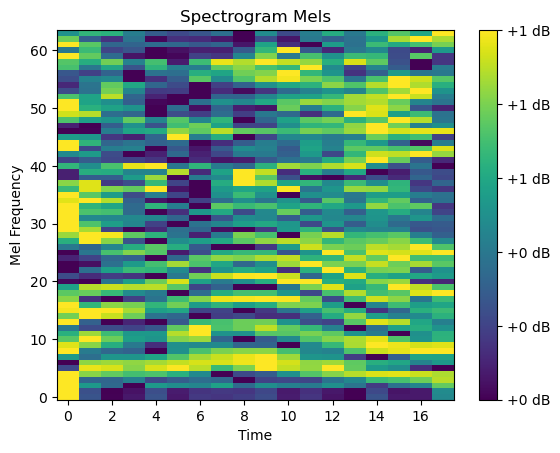

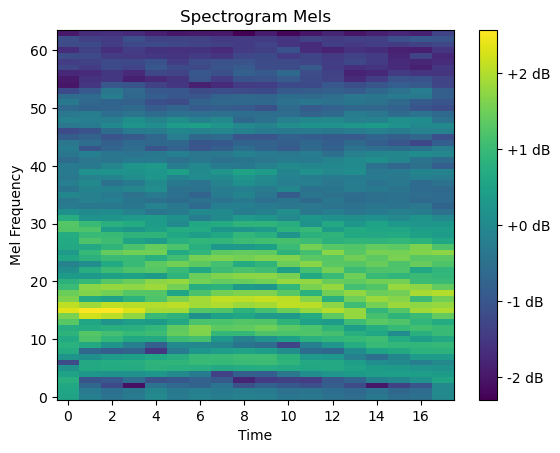

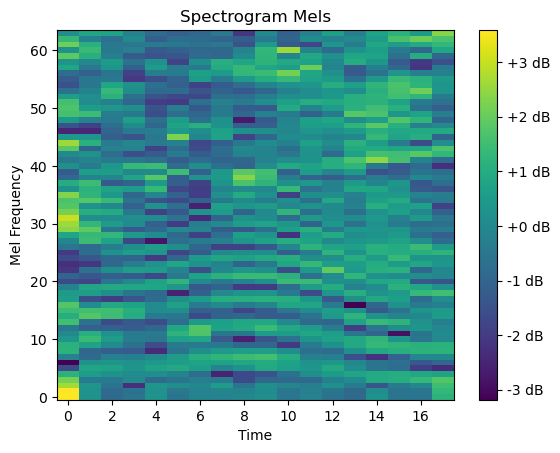

In [79]:
plt.imshow(dbspec.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

plt.imshow(nmel.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

plt.imshow(nmel2.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

plt.imshow(nmel3.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()
plt.imshow(zmel_1.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()
plt.imshow(zmel_2.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

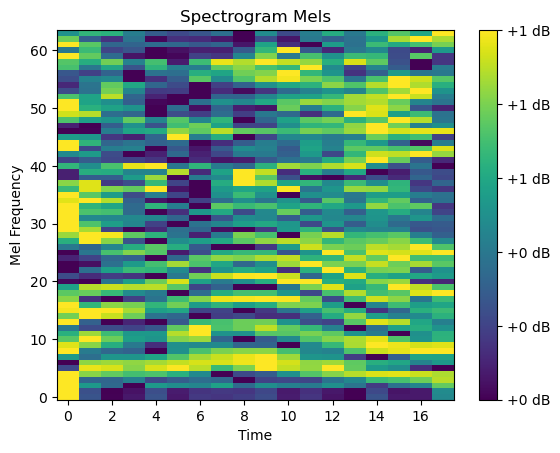

In [7]:
plt.imshow(mel_spec.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

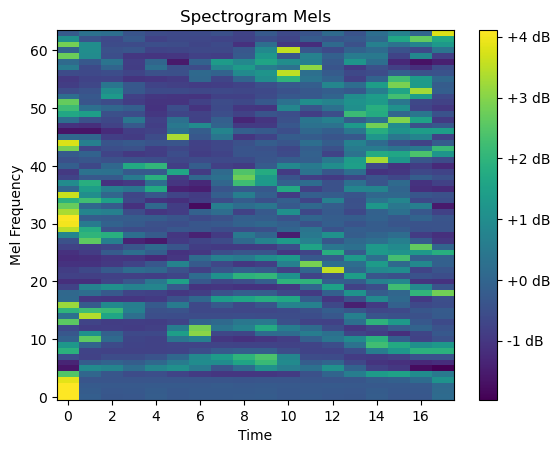

In [36]:
plt.imshow(nmels.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

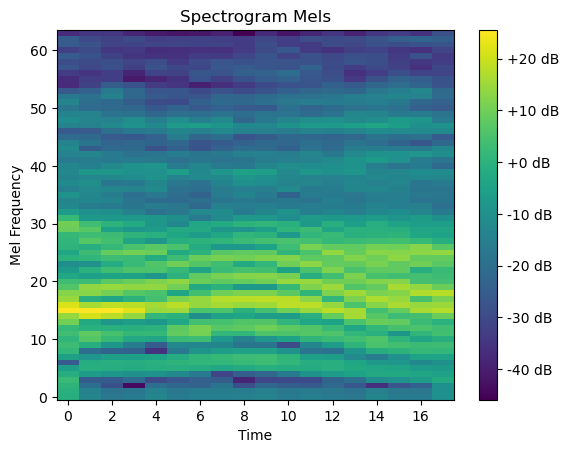

In [37]:
plt.imshow(dbmels.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

In [55]:
dbmels

tensor([[ -1.2498,  -0.5893,   0.6245,  ..., -25.5470, -25.1614, -36.8640],
        [-13.3960, -14.3040, -19.8212,  ..., -27.6777, -30.1445, -34.2110],
        [-17.5860, -18.7124, -28.5673,  ..., -31.1600, -31.7072, -34.5063],
        ...,
        [-16.5976, -17.7110, -27.1327,  ..., -28.8706, -24.2048, -32.8642],
        [-16.5634, -17.5180, -23.6509,  ..., -28.0515, -22.8436, -35.4382],
        [-10.0454,  -9.9657, -10.0545,  ..., -27.2652, -24.1762, -28.0857]])

In [56]:
min_val = dbmels.min(0)[0]
max_val = dbmels.max(0)[0]

In [57]:
minmax_spec = (dbmels - min_val) / (max_val - min_val)

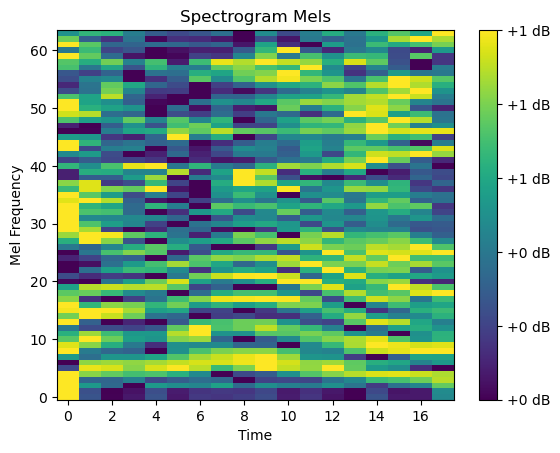

In [59]:
plt.imshow(minmax_spec.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

In [10]:
guide_file = pd.read_csv(os.path.join(src_, "guide_mod.csv"))

guide_file = guide_file[~guide_file["stress_type"].isin(["SNA", "2"])]
guide_file = guide_file[guide_file['nSample'] > 400]
guide_file = guide_file[guide_file['nSample'] <= 8000]

In [11]:
guide_file['stress_type'].value_counts()

stress_type
1    771102
0    560525
Name: count, dtype: int64

In [9]:
import torch.nn as nn

class PCEN(nn.Module):
    def __init__(self,in_features,bias=False):
        super(PCEN,self).__init__()

        self.log_alpha = nn.Parameter((torch.randn(in_features)*0.1+1.0).log_())
        self.log_delta = nn.Parameter((torch.randn(in_features)*0.1+1.0).log_())
        self.log_r     = nn.Parameter((torch.randn(in_features)*0.1+1.0).log_())
        self.eps = 0.00001

    def forward(self,x,smoother):
        alpha = self.log_alpha.exp().expand_as(x)
        delta = self.log_delta.exp().expand_as(x)
        r     = self.log_r.exp().expand_as(x)

        pcen = (x/(self.eps + smoother)**alpha + delta)**r - delta**r
        return pcen

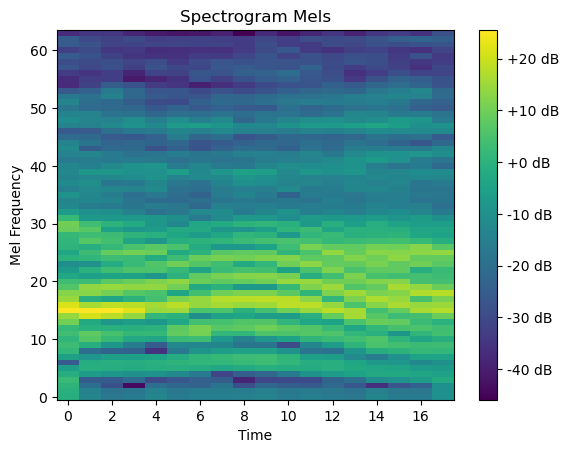

In [10]:
plt.imshow(mel_spec.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

In [11]:
pcen = PCEN(64)

In [12]:
pmels = pcen(mel_spec, 1)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

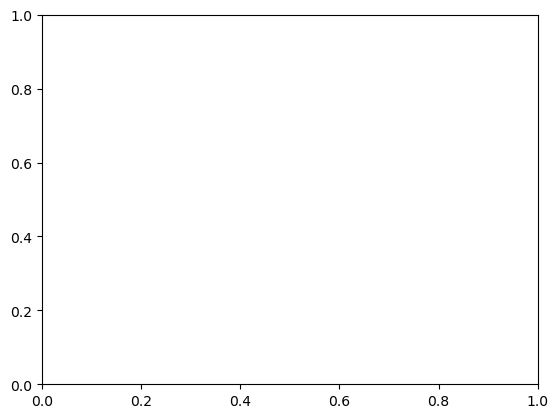

In [14]:
plt.imshow(pmels.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram Mels')
plt.show()

In [45]:
import numpy as np

In [50]:
x = np.random.random((25, 64))

In [51]:
np.min(x)

0.0014133036100801855

In [83]:
x = torch.rand((4, 5))

tensor([[0.9378],
        [0.9331],
        [0.8790],
        [0.7875]])

In [87]:
x - x.max(1, keepdim=True)[0]

tensor([[-0.3757, -0.8249, -0.5708, -0.6283,  0.0000],
        [-0.9169, -0.0623, -0.1194,  0.0000, -0.2440],
        [-0.0828, -0.7697, -0.8628, -0.7415,  0.0000],
        [-0.2481, -0.5594,  0.0000, -0.3640, -0.7664]])